# Real-time carbon accounting and material transition for hydrogen systems

__author__ = "Marco De Sousa"
__copyright__ = "Copyright 2023, Multi-parametric Optimization & Control Lab"
__credits__ = ["Marco De Sousa", "Rahul Kakodkar", "Efstratios N. Pistikopoulos"]
__license__ = "MIT"
__version__ = "1.1.0"
__maintainer__ = "Marco De Sousa"
__email__ = "marcopdsousa@tamu.edu"
__status__ = "Production"


## Problem Statement

The following case study considers three different type of solar photovoltaics, namely Monocrystalline (PV_Mo), Polycrystalline (PV_Po), and Cadmium Telluride (PV_Cd) and  Lithium-ion batteries made of either rock-based lithium (LiI_Ro) or brine-based lithium (LiI_Br).

The goal is to meet a fixed demand of hydrogen on a daily scale while optimizing the production process by using forecasting techniques.

It is important to note that three different hydrogen pathways can be utilized each with their respective emissions.

Hypothesis: By using real-time carbon accounting, decisions and changes can be made in a more dynamic nature.

Users are advised caution in terms of assigning the emissions at the appropriate levels and avoiding double account. For example, if providing the global warming potentials (GWP) for each individual material to make up a process, the GWP for processes should only consider the values for construction. Moreover, the direct emissions are considered through the resource balance constraint.

## Nomenclature



*Sets*


$\mathcal{R}$ - set of all resources r

$\mathcal{P}$ - set of all processes p

$\mathcal{T}$ - set of temporal periods t

$\mathcal{B}$ - set of transport modes b

$\mathcal{L}$ - set of locations l

$\mathcal{M}$ - set of materials m

*Subsets*


$\mathcal{R}^{storage}$ - set of resources that can be stored

$\mathcal{R}^{sell}$ - set of resources that can be discharged

$\mathcal{R}^{demand}$ - set of resources that meet  demand

$\mathcal{R}^{cons}$ - set of resources that can be consumed

$\mathcal{R}^{trans}$ - set of resources that can be transported

$\mathcal{P}^{uncertain}$ - set of processes with uncertain capacity

$\mathcal{T}^{net}$ - set of temporal periods t for network level decision making

$\mathcal{T}^{sch}$ - set of temporal periods t for schedule level decision making

*Continuous Variables*


$P_{l,p,t}$ - production level of p $\in$  $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{sch}$  

$C_{l,r,t}$ - consumption of r $\in$ in $\mathcal{R}^{cons}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$S_{l,r,t}$ - discharge of r $\in$ in $\mathcal{R}^{demand}$ time period t $\in$ $\mathcal{T}^{sch}$ 

$Inv_{l,r,t}$ - inventory level of r $\in$ $\mathcal{R}^{storage}$  in time period t $\in$ $\mathcal{T}^{sch}$

$Cap^S_{l,r,t}$ - installed inventory capacity for resource r $\in$  $\mathcal{R}^{storage}$ in time period t $\in$ $\mathcal{T}^{net}$

$Cap^P_{l,p,t}$ - installed production capacity for process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Mat^P_{l,p,m,t}$ - material m $\in$ $\mathcal{M}$ used by process p $\in$ $\mathcal{P}$ in time period t $\in$ $\mathcal{T}^{net}$

$Em^{p/r/m}_{l,p/r/m,t}$ - emission from process/resource/material in time t $\in$ $\mathcal{T}^{net}$


*Binary Variables*

$X^P_{l,p,t}$ - network binary for production process p $\in$ $\mathcal{P}$

$X^S_{l,r,t}$ - network binary for inventory of resource r $\in$  $\mathcal{R}^{storage}$ 

*Parameters*

$Cap^{P-max}_{l,p,t}$ - maximum production capacity of process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Cap^{S-max}_{l,r,t}$ - maximum inventory capacity for process r $\in$ $\mathcal{R}^{storage}$ in time t $\in$ $\mathcal{T}^{net}$

$Capex_{l,p,t}$ - capital expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{net}$

$Vopex_{l,p,t}$ - variable operational expenditure for process p $\in$ $\mathcal{P}$ in time t $\in$ $\mathcal{T}^{sch}$

$Price_{l,r,t}$ - purchase price for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$C^{max}_{l,r,t}$ - maximum consumption availability for resource r $\in$ $\mathcal{R}^{cons}$ in time t $\in$ $\mathcal{T}^{sch}$

$D_{l,r,t}$ - demand for resource r $in$ $\mathcal{R}^{sell}$ in time t $\in$ $\mathcal{T}^{sch}$

$\alpha$ - annualization factor

$Mat^{cons}_{p,m}$ - material m $\in$ $\mathcal{M}$ consumed by process p $\in$ $\mathcal{P}$

$GWP^{p/r/m}_{l,p/r/m,t}$ - global warming indicators for process/resource/material in time t $\in$ $\mathcal{T}^{net}$


## MILP Formulation

Given is a mulit-scale modeling and optimization MILP framework for the simultaneous design and schedule planning of a single location energy system 

\begin{equation}
min \sum_{l \in \mathcal{L}} \Big(\sum_{t \in \mathcal{T}^{net}} \sum_{p \in \mathcal{P}} (\alpha \times Capex_{l,p,t} + Fopex_{l,p,t}) \times Cap^P_{l,p,t} +  \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}}  Vopex_{l,r,t} \times P_{l,r,t} 
\end{equation}

\begin{equation*}
+ \sum_{t \in \mathcal{T}^{sch}} \sum_{r \in \mathcal{R}^{cons}} C_{l,r,t} \times Price_{l,r,t} \Big)
\end{equation*}

\begin{equation}
Cap^S_{l,r,t} \leq Cap^{S-max}_{l,r,t} \times X^S_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Cap^P_{l,p,t} \leq Cap^{P-max}_{l,p,t} \times X^P_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}, l \in \mathcal{L}
\end{equation} 

\begin{equation}
P_{l,p,t} \leq Cap^{P}_{l,p,t}  \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{sch}
\end{equation} 

\begin{equation}
Inv_{l,r,t} \leq Cap^{S}_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}^{storage}, t \in \mathcal{T}^{sch}
\end{equation} 


\begin{equation}
- S_{l,r,t} \leq - D_{l,r,t}  \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
C_{l,r,t} \leq C^{max}_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
\sum_{p \in \mathcal{P}} P_{l,p,t} \times \eta(p,r) + C_{l,r,t} +  Inv_{l,r,t-1}=  Inv_{l,r,t} + S_{l,r,t}  
\end{equation}

\begin{equation*}
\forall r \in \mathcal{R}^{cons}, t \in \mathcal{T}^{sch}, l \in \mathcal{L}
\end{equation*}

\begin{equation}
Mat_{l,p,m,t} = Mat^{cons}_{p,m} \times Cap^P_{l,p,t} \hspace{1cm} \forall m \in \mathcal{M}, p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{r}_{l,r,t} = GWP^{r}_{l,r,t} \times C_{l,r,t} \hspace{1cm} \forall r \in \mathcal{R}, t \in \mathcal{T}^{sch}
\end{equation}

\begin{equation}
Em^{m}_{l,m,t} = GWP^{m}_{l,m,t} \times \sum_{p \in \mathcal{P}} Mat_{l,p,m,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
Em^{p}_{l,p,t} = GWP^{p}_{l,p,t} \times Cap_{l,p,t} \hspace{1cm} \forall p \in \mathcal{P}, t \in \mathcal{T}^{net}
\end{equation}

\begin{equation}
S_{l,r,t}, C_{l,r,t}, Inv_{l,r,t}, P_{l,p,t}, Cap^P_{l,p,t}, Cap^S_{l,r,t}, Mat_{l,p,m,t}, Em^{p/r/m}_{l,p/r/m,t} \in R_{\geq 0}
\end{equation}



## Import Modules

In [2]:
import sys
sys.path.append('../src')

In [3]:
import pandas as pd
import numpy
from energiapy.components.temporal_scale import TemporalScale
from energiapy.components.resource import Resource, VaryingResource
from energiapy.components.process import Process, VaryingProcess
from energiapy.components.material import Material
from energiapy.components.location import Location
from energiapy.components.network import Network
from energiapy.components.scenario import Scenario
from energiapy.components.transport import Transport
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.plot import plot_results, plot_scenario
from energiapy.plot.plot_results import CostY, CostX
from energiapy.model.solve import solve
from itertools import product
from energiapy.components.result import Result
from itertools import product
from matplotlib import rc
import matplotlib.pyplot as plt
from energiapy.model.solve import solve
from energiapy.plot.plot_results import CostY, CostX
from energiapy.components.location import Location
from energiapy.plot import plot_results, plot_scenario
from energiapy.utils.nsrdb_utils import fetch_nsrdb_data
from energiapy.model.formulate import formulate, Constraints, Objective
from energiapy.model.bounds import CapacityBounds
from energiapy.utils.data_utils import get_data, make_henry_price_df, remove_outliers, load_results
from energiapy.conversion.photovoltaic import solar_power_output
from energiapy.conversion.windmill import wind_power_output
from energiapy.model.constraints.integer_cuts import constraint_block_integer_cut, constraint_block_integer_cut_min

## Data Import

In [4]:
horizon = 1

The following data is needed for the model

- Daily demands of hydrogen.
- The capacity factor of renewable energy sources and traditional grid power.


**Declare temporal scale**

The variabilities of energy systems are best captured over a discretized spatio-temporal scale. In energiapy, the first declaration is the temporal scale. 

For e.g.: Here we declare three temporal scales at different levels from right to left. The interpretation of these scales is merely symentic. Scales can be declared as the problem demands.
- 0, annual, with 1 discretization
- 1, daily with 365 discretization
- 2, hourly with 24 discretization

In essence, we are creating a temporal scale of 8760 points.



In [5]:
scales = TemporalScale(discretization_list=[1, 24])

## Declare resources

Resources can be consumed, produced, stored, discharged (or sold).

Power demand follows a varying deterministic demand

In [6]:
bigM = 10**4
smallM = 0.001

Hourly electricity prices

In [7]:
#Electricity price is hourly
elec_price_df1 = pd.read_csv('NEWYORK_ELEC.csv')
elec_price_df1 = elec_price_df1[elec_price_df1['Settlement Point'] == 'HB_HOUSTON']
elec_price_df1 = elec_price_df1[['Settlement Point Price']].reset_index(drop = True)

In [8]:
elec_price_df1

,Settlement Point Price
0,28.06
1,28.16
2,28.88
3,31.24
4,38.12
5,47.14
6,77.71
7,84.42
8,53.15
9,31.37


In [9]:
#Electricity price is hourly
elec_price_df = pd.read_csv('ERCOT_price.csv')
elec_price_df = elec_price_df[elec_price_df['BusName'] == 'FORMOSA_G8']
elec_price_df = elec_price_df[['LMP']].reset_index(drop = True)

In [10]:
elec_price_df

,LMP
0,18.16
1,16.54
2,15.82
3,14.26
4,14.59
5,15.71
6,20.08
7,17.98
8,11.40
9,8.93


Hourly Natural Gas Prices

In [11]:
#The natural gas price is calculated as the average between the high and low cost, also the unit used is $/kg of natural gas
NG_price_df = pd.read_csv('Naturalgas_price_hourly.csv')
NG_price_df = pd.DataFrame(NG_price_df['USD/kg'])[::-1].reset_index()
NG_price_df = NG_price_df[['USD/kg']]
#NG_price_df

In [12]:
#Gives relevancy to price values again
elec_price = elec_price_df.max()[0]
NG_price = NG_price_df.max()[0]
elec_price1 = elec_price_df1.max()[0]

C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14784\1579379311.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_price = elec_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14784\1579379311.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  NG_price = NG_price_df.max()[0]
C:\Users\marcopdsousa\AppData\Local\Temp\ipykernel_14784\1579379311.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  elec_pri

Hourly Wind availability

In [13]:
Wind_df = pd.read_csv('Wind2424.csv')
Wind_df = Wind_df[['ACTUAL_SYSTEM_WIDE']]
Wind_df = Wind_df[:24]
#Wind_df

Hourly Solar availability

In [14]:
Solar_df = pd.read_csv('Solar2424.csv')
Solar_df = Solar_df[['PVGRPP_SYSTEM_WIDE']]
Solar_df = Solar_df[:24]
Solar_df

,PVGRPP_SYSTEM_WIDE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.1
7,1661.0
8,11338.4
9,17619.4


Solar capacity for New York

In [15]:
Solar_df1 = pd.read_csv('Solar_NY.csv')
Solar_df1 = Solar_df1[['PVGRPP_SYSTEM_WIDE']]
Solar_df1 = Solar_df1[:24]
Solar_df1

,PVGRPP_SYSTEM_WIDE
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.1
7,237.0
8,1413.4
9,2041.3


In [33]:
#Beep

#The following are components of natural gas

# CO2 = Resource(name='CO2', basis='kg/hr',
#                label='Carbon dioxide', block='Resource')

# CO2_Stack = Resource(name='CO2 to Stack', basis='kg/hr', sell=True,
#                 label='Carbon dioxide to Stack', block='Resource', gwp = 1)


# CO2_Air = Resource(name='CO2 from air', basis='kg/hr',
#                label='Carbon dioxide from air', block='Resource', cons_max=bigM)

# CO2_Vent = Resource(name='CO2 Vented from the process', basis='kg/hr',
#                label='Carbon dioxide vented from the process', block='Resource', gwp = 1, sell=True)

# CO2cpt = Resource(name='CO2 Captured', basis='kg/hr', sell=True, label='Captured carbon dioxide', block='Resource')

# CH4 = Resource(name='CH4', basis='kg/hr',
#                label='Methane', block='Resource')

#Important: Natural gas consists over different components

In [16]:
#Halil's power supplies

Solar_Ho = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', gwp=0)

Power = Resource(name='Power', basis='MW',
                 label='Power generated')

GridPower_Ho = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', price = elec_price, varying = [VaryingResource.DETERMINISTIC_PRICE], gwp=420.62)

#Power supplies in New York

GridPower_NY = Resource(name='GridPower', basis='MW',
                     cons_max=bigM, label='Power bought', price = elec_price1, varying = [VaryingResource.DETERMINISTIC_PRICE], gwp=370)

Solar_NY = Resource(name='Solar', cons_max=bigM, basis='MW', label='Solar Power', gwp=0)


#This is my product that is in demand

Halide = Resource(name='Halil product', basis = 'kg/hr', demand= True, label ='Halide', block='Resource')

#Halil's resources

Cast_steel = Resource(name='steel', basis = 'kg/hr', label ='Cast steel', block='Resource')

Scrap_metal = Resource(name='scrap metal', basis = 'kg/hr', label = 'scrap metal', block = 'Resource')

#Emissions occuring

CO2 = Resource(name='CO2 emitted', basis='kg/hr', sell=True,
                label='Carbon dioxide emitted into air', block='Resource', gwp = 1)






## Declare Materials

Materials are utilized for the establishment of processes. Materials inturn require resources to be set up. 

In [17]:
'''Do I understand it correctly that I will have no material modes'''

'Do I understand it correctly that I will have no material modes'

## Declare Processes

In [18]:
'''Purchasing electricity from a traditional power production system'''

# Houston Area data

Grid = Process(name='Grid', conversion={GridPower_Ho: -1, Power: 1}, prod_min=0, prod_max=500, label='Grid', basis='MW')

PV = Process(name='PV', conversion={Solar_Ho: -1, Power: 0.8},
             prod_max=150, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

# New York area data

Grid2 = Process(name='Grid', conversion={GridPower_NY: -1, Power: 1}, prod_min=0, prod_max=500, label='Grid', basis='MW')

PV2 = Process(name='PV', conversion={Solar_NY: -1, Power: 0.8},
             prod_max=150, prod_min=0,  varying= [VaryingProcess.DETERMINISTIC_CAPACITY], label='Solar PV', basis='MW')

'''Process to create Halide'''

Halil = Process(name='Halil', conversion={Power: -0.0009, Cast_steel:-1.2, Halide: 1, CO2:2}, capex=0.0001,
               vopex=2, fopex=0.001, prod_min=0, prod_max=50, label='Halide', basis='kg/hr')


CST = Process(name='Cast Steel Production', conversion={Power: -0.002, Scrap_metal:-2 ,Cast_steel:1}, capex=0.0001,
                vopex=1.1, fopex=0.001, prod_min=0, prod_max=bigM, label='cast steel', basis='kg/hr')


## Declare Location

In [20]:
process_set_Ho = {Grid, PV, CST}#, SMRCCS, PEM, Grid, WF, SMR, SMRCCS, PEM

process_set_NY = {Grid2, PV2, Halil}

In [30]:
houston = Location(name='HO', processes=process_set_Ho, capacity_factor={PV: Solar_df}, price_factor={GridPower_Ho: elec_price_df}, 
                   scales=scales, label='Houston', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, capacity_scale_level=1)

Newyork = Location(name='NY', processes=process_set_NY, capacity_factor={PV2: Solar_df1}, price_factor={GridPower_NY: elec_price_df1}, 
                   scales=scales, label='Newyork', expenditure_scale_level=0, demand_scale_level=0, price_scale_level=1, capacity_scale_level=1)

Declare Transport

In [41]:
Train_H2 = Transport(name='Train_H2', resources={
                     Cast_steel}, trans_max=bigM, trans_loss=0.03, label='Railway for cast steel transportation')
Grid = Transport(name='Grid', resources={
                 Power}, trans_max=bigM, trans_loss=0.001, label='Railroad transport electricity consumption')

#trans_cost=1.667*10**(-3),
#trans_cost=0.5*10**(-3),


Declare Network


In [43]:
distance_matrix = [
    [2366],
    [2620]
]

transport_matrix = [
    [[Train_H2]],
    [[Train_H2]],
]

network = Network(name='Network',source_locations=[houston], sink_locations=[Newyork], scales=scales)

IndexError: list index out of range

## Declare Scenario

In [32]:

scenario = Scenario(name='scenario_full', network=network , scales=scales,  expenditure_scale_level=0, demand_scale_level=0, 
                    purchase_scale_level = 1, scheduling_scale_level=1, network_scale_level=0, capacity_scale_level=1,
                    label='full_case', demand={Newyork: { Halide: 500000}})

In [29]:

# plot_scenario.price_factor(
#     scenario=scenario, location=houston, resource= GridPower_Ho, fig_size=(9, 5), color='black')


In [25]:

# plot_scenario.price_factor(
#     scenario=scenario, location=Newyork, resource=GridPower_NY, fig_size=(9, 5), color='black')

In [27]:
# plot_scenario.capacity_factor(
#     scenario=scenario, location=houston, process=PV, fig_size=(9, 5), color='red')

In [28]:
# plot_scenario.capacity_factor(
#     scenario=scenario, location=Newyork, process=PV2, fig_size=(9, 5), color='red')

## Formulate MILP

Here we formulate two milps which differ only in their objectives.

For maximizing the discharge of a particular resource, use the objective MAX_DISCHARGE, the objective resource also needs to be specified.

Similarly the discharge can also be minimized using MIN_DISCHARGE. This can be used with a demand for another resource being set. For example, minimizing the discharge of carbon dioxide while meeting a hydrogen demand.

The second MILP, minimized the cost while meeting a varying demand for power

In [23]:
#, Constraints.MODE

milp_cost = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                      Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [24]:
scales.scale_iter(2)

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23)]

In [25]:
# model.component

from pyomo.environ import ConstraintList
milp_cost.cons1 = ConstraintList()
for i in scales.scale_iter(2):
    milp_cost.cons1.add(expr = milp_cost.P['HO', 'SMR', *i] >= 5)

In [26]:
milp_cost.cons1.pprint()

cons1 : Size=24, Index={1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24}, Active=True
    Key : Lower : Body           : Upper : Active
      1 :   5.0 :  P[HO,SMR,0,0] :  +Inf :   True
      2 :   5.0 :  P[HO,SMR,0,1] :  +Inf :   True
      3 :   5.0 :  P[HO,SMR,0,2] :  +Inf :   True
      4 :   5.0 :  P[HO,SMR,0,3] :  +Inf :   True
      5 :   5.0 :  P[HO,SMR,0,4] :  +Inf :   True
      6 :   5.0 :  P[HO,SMR,0,5] :  +Inf :   True
      7 :   5.0 :  P[HO,SMR,0,6] :  +Inf :   True
      8 :   5.0 :  P[HO,SMR,0,7] :  +Inf :   True
      9 :   5.0 :  P[HO,SMR,0,8] :  +Inf :   True
     10 :   5.0 :  P[HO,SMR,0,9] :  +Inf :   True
     11 :   5.0 : P[HO,SMR,0,10] :  +Inf :   True
     12 :   5.0 : P[HO,SMR,0,11] :  +Inf :   True
     13 :   5.0 : P[HO,SMR,0,12] :  +Inf :   True
     14 :   5.0 : P[HO,SMR,0,13] :  +Inf :   True
     15 :   5.0 : P[HO,SMR,0,14] :  +Inf :   True
     16 :   5.0 : P[HO,SMR,0,15] :  +Inf :   True
     17 :   5.0 : P[HO,SMR

In [27]:
# model.component

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_cost.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_cost.cons2.add(expr = milp_cost.P['HO', 'SMR', *i] - milp_cost.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [28]:
milp_cost.cons2.pprint()

cons2 : Size=23, Index={1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}, Active=True
    Key : Lower : Body                            : Upper : Active
      1 :  -Inf :   P[HO,SMR,0,1] - P[HO,SMR,0,0] :   3.0 :   True
      2 :  -Inf :   P[HO,SMR,0,2] - P[HO,SMR,0,1] :   3.0 :   True
      3 :  -Inf :   P[HO,SMR,0,3] - P[HO,SMR,0,2] :   3.0 :   True
      4 :  -Inf :   P[HO,SMR,0,4] - P[HO,SMR,0,3] :   3.0 :   True
      5 :  -Inf :   P[HO,SMR,0,5] - P[HO,SMR,0,4] :   3.0 :   True
      6 :  -Inf :   P[HO,SMR,0,6] - P[HO,SMR,0,5] :   3.0 :   True
      7 :  -Inf :   P[HO,SMR,0,7] - P[HO,SMR,0,6] :   3.0 :   True
      8 :  -Inf :   P[HO,SMR,0,8] - P[HO,SMR,0,7] :   3.0 :   True
      9 :  -Inf :   P[HO,SMR,0,9] - P[HO,SMR,0,8] :   3.0 :   True
     10 :  -Inf :  P[HO,SMR,0,10] - P[HO,SMR,0,9] :   3.0 :   True
     11 :  -Inf : P[HO,SMR,0,11] - P[HO,SMR,0,10] :   3.0 :   True
     12 :  -Inf : P[HO,SMR,0,12] - P[HO,SMR,0,11] :   3.0 :   True
     13 :

In [29]:
scales.scale_iter(2)[scales.scale_iter(2).index((0,1)) - 1]

(0, 0)

## Optimize to maximize resource discharge

## Optimize to minimize cost

In [30]:
results_cost = solve(scenario=scenario, instance=milp_cost,
                     solver='gurobi', name=f"res_cost", print_solversteps=True, saveformat = '.pkl')


Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1526 rows, 1527 columns and 3877 nonzeros
Model fingerprint: 0xc702eaff
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1452 rows and 1476 columns
Presolve time: 0.00s
Presolved: 74 rows, 51 columns, 194 nonzeros
Variable types: 50 continuous, 1 integer (1 binary)
Found heuristic solution: objective 830.4485869

Root relaxation: interrupted, 17 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd

In [31]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0,
 ('WF', 0): 0.0}

In [32]:
results_cost.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.009578947368421051,
 ('HO', 'Grid', 0, 9): 0.011528947368421052,
 ('HO', 'Grid', 0, 10): 0.01347894736842105,
 ('HO', 'Grid', 0, 11): 0.01542894736842105,
 ('HO', 'Grid', 0, 12): 0.017378947368421053,
 ('HO', 'Grid', 0, 13): 0.019328947368421053,
 ('HO', 'Grid', 0, 14): 0.02127894736842105,
 ('HO', 'Grid', 0, 15): 0.02322894736842105,
 ('HO', 'Grid', 0, 16): 0.025178947368421047,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.01737894736842105,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.02127894736842105,
 ('HO', 'Grid', 0, 22): 0.023228947368421054,
 ('HO', '

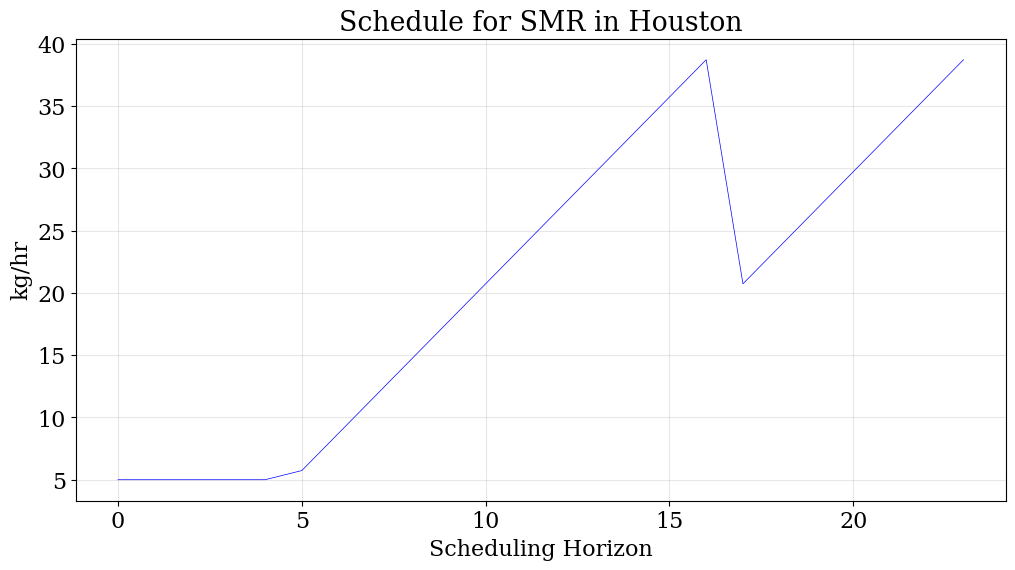

In [33]:
plot_results.schedule(results = results_cost, y_axis= 'P', component = 'SMR', location='HO')

In [34]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [35]:
results_cost.output['P']

{('HO', 'Grid', 0, 0): 0.00325,
 ('HO', 'Grid', 0, 1): 0.0032499999999999994,
 ('HO', 'Grid', 0, 2): 0.00325,
 ('HO', 'Grid', 0, 3): 0.00325,
 ('HO', 'Grid', 0, 4): 0.00325,
 ('HO', 'Grid', 0, 5): 0.003728947368421052,
 ('HO', 'Grid', 0, 6): 0.005678947368421052,
 ('HO', 'Grid', 0, 7): 0.007628947368421051,
 ('HO', 'Grid', 0, 8): 0.009578947368421051,
 ('HO', 'Grid', 0, 9): 0.011528947368421052,
 ('HO', 'Grid', 0, 10): 0.01347894736842105,
 ('HO', 'Grid', 0, 11): 0.01542894736842105,
 ('HO', 'Grid', 0, 12): 0.017378947368421053,
 ('HO', 'Grid', 0, 13): 0.019328947368421053,
 ('HO', 'Grid', 0, 14): 0.02127894736842105,
 ('HO', 'Grid', 0, 15): 0.02322894736842105,
 ('HO', 'Grid', 0, 16): 0.025178947368421047,
 ('HO', 'Grid', 0, 17): 0.013478947368421049,
 ('HO', 'Grid', 0, 18): 0.015428947368421052,
 ('HO', 'Grid', 0, 19): 0.01737894736842105,
 ('HO', 'Grid', 0, 20): 0.019328947368421053,
 ('HO', 'Grid', 0, 21): 0.02127894736842105,
 ('HO', 'Grid', 0, 22): 0.023228947368421054,
 ('HO', '

In [36]:

data = results_cost.output['P']

In [37]:
df = pd.DataFrame(data,index=[0])

In [38]:
df

HO                                                                    \
      Grid                                                                     
         0                                                                     
        0        1        2        3        4         5         6         7    
0  0.00325  0.00325  0.00325  0.00325  0.00325  0.003729  0.005679  0.007629   

                       ...                                                    
                       ...   WF                                               
                       ...    0                                               
         8         9   ...   14   15   16   17   18   19   20   21   22   23  
0  0.009579  0.011529  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[1 rows x 144 columns]

In [39]:
df=df.T

In [40]:
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostprod.xlsx', index=True)

In [41]:
# data = results_cost.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mincostresource_emission.xlsx', index=True)

In [42]:
milp_cost.constraint_inventory_balance.pprint()

constraint_inventory_balance : mass balance across scheduling scale
    Size=432, Index=locations*resources*{0}*{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}, Active=True
    Key                                          : Lower : Body                                                                                                                                                                                      : Upper : Active
                    ('HO', 'CO2 Captured', 0, 0) :   0.0 :                          0*P_m[HO,Grid,0,0,0] + 0*P_m[HO,PEM,0,0,0] + 0*P_m[HO,PV,0,0,0] + 0*P_m[HO,SMR,0,0,0] + 8.903*P_m[HO,SMRCCS,0,0,0] + 0*P_m[HO,WF,0,0,0] - S[HO,CO2 Captured,0,0] :   0.0 :   True
                    ('HO', 'CO2 Captured', 0, 1) :   0.0 :                          0*P_m[HO,Grid,0,0,1] + 0*P_m[HO,PEM,0,0,1] + 0*P_m[HO,PV,0,0,1] + 0*P_m[HO,SMR,0,0,1] + 8.903*P_m[HO,SMRCCS,0,0,1] + 0*P_m[HO,WF,0,0,1] - S[HO,CO2 Captured,0,1] :   0.0 :   True
  

In [43]:
results_cost.output['objective']

830.4485869096605

In [44]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 100.0}

In [45]:
# plot_results.cost(results=results_cost, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [46]:
results_cost.output['global_warming_potential_location']

{('HO', 0): 5990.6943450154995}

In [47]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0,
 ('WF', 0): 0.0}

In [48]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [49]:
results_cost.output['global_warming_potential_process']

{('HO', 'Grid', 0): 0.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 0.0,
 ('HO', 'SMR', 0): 0.0,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 0.0}

In [50]:
results_cost.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 1.0}

In [51]:
milp_gwp = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.MIN_GWP, demand_sign = 'eq')

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [52]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons1.add(expr = milp_gwp.P['HO', 'PEM', *i] - milp_gwp.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)


In [53]:

from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp.cons2.add(expr = milp_gwp.P['HO', 'SMR', *i] - milp_gwp.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

In [54]:
# model.component

from pyomo.environ import ConstraintList
milp_gwp.cons3 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp.cons3.add(expr = milp_gwp.P['HO', 'SMRCCS', *i] >= 5)

In [55]:
milp_gwp.constraint_resource_purchase_varying.pprint()

constraint_resource_purchase_varying : calculates varying amount spent on resource consumption
    Size=48, Index=locations*resources_varying_price*{0}*{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}, Active=True
    Key                          : Lower : Body                                                          : Upper : Active
       ('HO', 'GridPower', 0, 0) :   0.0 :               B[HO,GridPower,0,0] - 18.16*C[HO,GridPower,0,0] :   0.0 :   True
       ('HO', 'GridPower', 0, 1) :   0.0 :               B[HO,GridPower,0,1] - 16.54*C[HO,GridPower,0,1] :   0.0 :   True
       ('HO', 'GridPower', 0, 2) :   0.0 :               B[HO,GridPower,0,2] - 15.82*C[HO,GridPower,0,2] :   0.0 :   True
       ('HO', 'GridPower', 0, 3) :   0.0 :               B[HO,GridPower,0,3] - 14.26*C[HO,GridPower,0,3] :   0.0 :   True
       ('HO', 'GridPower', 0, 4) :   0.0 :               B[HO,GridPower,0,4] - 14.59*C[HO,GridPower,0,4] :   0.0 :   True
       ('HO', 'G

In [56]:
results_gwp = solve(scenario=scenario, instance=milp_gwp,
                     solver='gurobi', name=f"res_gwp", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1550 rows, 1527 columns and 3937 nonzeros
Model fingerprint: 0xb0fb5da6
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1495 rows and 1471 columns
Presolve time: 0.00s
Presolved: 55 rows, 56 columns, 164 nonzeros
Variable types: 56 continuous, 0 integer (0 binary)

Root relaxation: objective 3.366295e+02, 15 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0     0  

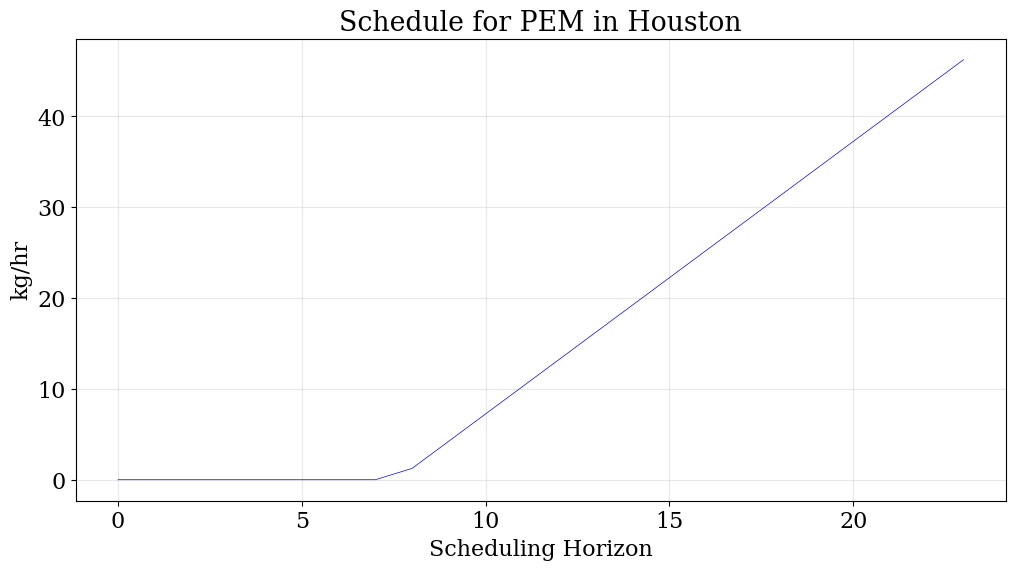

In [57]:
plot_results.schedule(results = results_gwp, y_axis= 'P', component = 'PEM', location='HO')

In [58]:
results_gwp.output['Cost']

{None: 5641.387879064264}

In [59]:
results_gwp.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 1.25,
 ('HO', 'PEM', 0, 9): 4.25,
 ('HO', 'PEM', 0, 10): 7.25,
 ('HO', 'PEM'

In [60]:
# data = results_gwp.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod.xlsx', index=True)

In [61]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 100.0}

In [62]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0,
 ('HO', 'WF', 0): 100.0}

In [63]:
milp_gwp.constraint_global_warming_potential_resource.pprint()

constraint_global_warming_potential_resource : global warming potential for the each resource
    Size=18, Index=locations*resources*{0}, Active=True
    Key                                      : Lower : Body                                                                                                                                                : Upper : Active
                   ('HO', 'CO2 Captured', 0) :   0.0 :                               global_warming_potential_resource[HO,CO2 Captured,0] - global_warming_potential_resource_discharge[HO,CO2 Captured,0] :   0.0 :   True
    ('HO', 'CO2 Vented from the process', 0) :   0.0 : global_warming_potential_resource[HO,CO2 Vented from the process,0] - global_warming_potential_resource_discharge[HO,CO2 Vented from the process,0] :   0.0 :   True
                   ('HO', 'CO2 from air', 0) :   0.0 :                             global_warming_potential_resource[HO,CO2 from air,0] - global_warming_potential_resource_consumption[HO,CO2

In [64]:
scenario.resource_gwp_dict

{'HO': {'H2O to Stack': 0,
  'GridPower': 420.62,
  'H2O vented from the process': 0,
  'N2 from Air': 0,
  'CO2 from air': 0,
  'CO2 to Stack': 1,
  'H2O from air': 0,
  'Pure Hydrogen': 0,
  'O2 to Stack': 0,
  'Wind': 0,
  'O2 from air': 0,
  'Solar': 0,
  'H2O Fresh': 0,
  'Power': 0,
  'CO2 Vented from the process': 1,
  'Natural Gas': 0.660979,
  'N2 to Stack': 0,
  'CO2 Captured': 0}}

In [65]:
results_gwp.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 1.0,
 ('HO', 'PV', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 1.0,
 ('HO', 'WF', 0): 1.0}

In [66]:
results_cost.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 1.0}

In [67]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0,
 ('HO', 'WF', 0): 100.0}

In [68]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 100.0}

In [69]:
results_gwp.output['Capex_network']

{0: 2.02}

In [70]:
results_gwp.output['Fopex_network']

{0: 20.2}

In [71]:
results_gwp.output['Vopex_network']

{0: 2049.8400000000065}

In [72]:
results_gwp.output['B_network']

{('CO2 from air', 0): 0.0,
 ('GridPower', 0): 0.0,
 ('H2O Fresh', 0): 9.781523497479952,
 ('H2O from air', 0): 0.0,
 ('N2 from Air', 0): 0.0,
 ('Natural Gas', 0): 50.50779659107529,
 ('O2 from air', 0): 0.0,
 ('Solar', 0): 786.5394015571501,
 ('Wind', 0): 2722.499157418551}

In [73]:
results_cost.output['B_network']

{('CO2 from air', 0): 0.0,
 ('GridPower', 0): 3.168049710526316,
 ('H2O Fresh', 0): 16.78877421,
 ('H2O from air', 0): 0.0,
 ('N2 from Air', 0): 0.0,
 ('Natural Gas', 0): 210.44915246281846,
 ('O2 from air', 0): 0.0,
 ('Solar', 0): 0.0,
 ('Wind', 0): 0.0}

In [74]:
results_cost.output['C_network']

{('CO2 from air', 0): 5.8549999999999995,
 ('GridPower', 0): 0.32499999999999996,
 ('H2O Fresh', 0): 8394.387105,
 ('H2O from air', 0): 79.1,
 ('N2 from Air', 0): 9606.7,
 ('Natural Gas', 0): 1767.5945000000002,
 ('O2 from air', 0): 2943.58,
 ('Solar', 0): 0.0,
 ('Wind', 0): 0.0}

In [75]:
results_cost.output['P']['HO','SMR',0,0]

5.0

In [76]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

[(('HO', 'SMR', 0, 0), 5.0), (('HO', 'SMR', 0, 1), 5.0), (('HO', 'SMR', 0, 2), 5.0), (('HO', 'SMR', 0, 3), 5.0), (('HO', 'SMR', 0, 4), 5.0), (('HO', 'SMR', 0, 5), 5.7368421052631575), (('HO', 'SMR', 0, 6), 8.736842105263158), (('HO', 'SMR', 0, 7), 11.736842105263158), (('HO', 'SMR', 0, 8), 14.736842105263158), (('HO', 'SMR', 0, 9), 17.736842105263158), (('HO', 'SMR', 0, 10), 20.736842105263158), (('HO', 'SMR', 0, 11), 23.736842105263158), (('HO', 'SMR', 0, 12), 26.736842105263158), (('HO', 'SMR', 0, 13), 29.736842105263158), (('HO', 'SMR', 0, 14), 32.73684210526316), (('HO', 'SMR', 0, 15), 35.73684210526316), (('HO', 'SMR', 0, 16), 38.73684210526316), (('HO', 'SMR', 0, 17), 20.736842105263154), (('HO', 'SMR', 0, 18), 23.736842105263158), (('HO', 'SMR', 0, 19), 26.736842105263158), (('HO', 'SMR', 0, 20), 29.736842105263158), (('HO', 'SMR', 0, 21), 32.73684210526316), (('HO', 'SMR', 0, 22), 35.73684210526316), (('HO', 'SMR', 0, 23), 38.73684210526316)]


In [77]:
[results_cost.output['P'][('HO', 'SMR', *i)] for i in scales.scale_iter(2)]

[5.0,
 5.0,
 5.0,
 5.0,
 5.0,
 5.7368421052631575,
 8.736842105263158,
 11.736842105263158,
 14.736842105263158,
 17.736842105263158,
 20.736842105263158,
 23.736842105263158,
 26.736842105263158,
 29.736842105263158,
 32.73684210526316,
 35.73684210526316,
 38.73684210526316,
 20.736842105263154,
 23.736842105263158,
 26.736842105263158,
 29.736842105263158,
 32.73684210526316,
 35.73684210526316,
 38.73684210526316]

In [78]:
results_cost.output['C']

{('HO', 'CO2 from air', 0, 0): 0.05855,
 ('HO', 'CO2 from air', 0, 1): 0.05855,
 ('HO', 'CO2 from air', 0, 2): 0.05855,
 ('HO', 'CO2 from air', 0, 3): 0.05855,
 ('HO', 'CO2 from air', 0, 4): 0.05855,
 ('HO', 'CO2 from air', 0, 5): 0.06717842105263157,
 ('HO', 'CO2 from air', 0, 6): 0.10230842105263158,
 ('HO', 'CO2 from air', 0, 7): 0.13743842105263157,
 ('HO', 'CO2 from air', 0, 8): 0.17256842105263157,
 ('HO', 'CO2 from air', 0, 9): 0.20769842105263156,
 ('HO', 'CO2 from air', 0, 10): 0.24282842105263158,
 ('HO', 'CO2 from air', 0, 11): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 12): 0.31308842105263157,
 ('HO', 'CO2 from air', 0, 13): 0.34821842105263157,
 ('HO', 'CO2 from air', 0, 14): 0.38334842105263156,
 ('HO', 'CO2 from air', 0, 15): 0.41847842105263156,
 ('HO', 'CO2 from air', 0, 16): 0.45360842105263155,
 ('HO', 'CO2 from air', 0, 17): 0.24282842105263153,
 ('HO', 'CO2 from air', 0, 18): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 19): 0.31308842105263157,
 ('HO', 'CO2

In [79]:
print([(key, value) for key, value in results_cost.output['P'].items() if key[1]=='SMR'])

[(('HO', 'SMR', 0, 0), 5.0), (('HO', 'SMR', 0, 1), 5.0), (('HO', 'SMR', 0, 2), 5.0), (('HO', 'SMR', 0, 3), 5.0), (('HO', 'SMR', 0, 4), 5.0), (('HO', 'SMR', 0, 5), 5.7368421052631575), (('HO', 'SMR', 0, 6), 8.736842105263158), (('HO', 'SMR', 0, 7), 11.736842105263158), (('HO', 'SMR', 0, 8), 14.736842105263158), (('HO', 'SMR', 0, 9), 17.736842105263158), (('HO', 'SMR', 0, 10), 20.736842105263158), (('HO', 'SMR', 0, 11), 23.736842105263158), (('HO', 'SMR', 0, 12), 26.736842105263158), (('HO', 'SMR', 0, 13), 29.736842105263158), (('HO', 'SMR', 0, 14), 32.73684210526316), (('HO', 'SMR', 0, 15), 35.73684210526316), (('HO', 'SMR', 0, 16), 38.73684210526316), (('HO', 'SMR', 0, 17), 20.736842105263154), (('HO', 'SMR', 0, 18), 23.736842105263158), (('HO', 'SMR', 0, 19), 26.736842105263158), (('HO', 'SMR', 0, 20), 29.736842105263158), (('HO', 'SMR', 0, 21), 32.73684210526316), (('HO', 'SMR', 0, 22), 35.73684210526316), (('HO', 'SMR', 0, 23), 38.73684210526316)]


In [80]:
results_cost.output['C']

{('HO', 'CO2 from air', 0, 0): 0.05855,
 ('HO', 'CO2 from air', 0, 1): 0.05855,
 ('HO', 'CO2 from air', 0, 2): 0.05855,
 ('HO', 'CO2 from air', 0, 3): 0.05855,
 ('HO', 'CO2 from air', 0, 4): 0.05855,
 ('HO', 'CO2 from air', 0, 5): 0.06717842105263157,
 ('HO', 'CO2 from air', 0, 6): 0.10230842105263158,
 ('HO', 'CO2 from air', 0, 7): 0.13743842105263157,
 ('HO', 'CO2 from air', 0, 8): 0.17256842105263157,
 ('HO', 'CO2 from air', 0, 9): 0.20769842105263156,
 ('HO', 'CO2 from air', 0, 10): 0.24282842105263158,
 ('HO', 'CO2 from air', 0, 11): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 12): 0.31308842105263157,
 ('HO', 'CO2 from air', 0, 13): 0.34821842105263157,
 ('HO', 'CO2 from air', 0, 14): 0.38334842105263156,
 ('HO', 'CO2 from air', 0, 15): 0.41847842105263156,
 ('HO', 'CO2 from air', 0, 16): 0.45360842105263155,
 ('HO', 'CO2 from air', 0, 17): 0.24282842105263153,
 ('HO', 'CO2 from air', 0, 18): 0.2779584210526316,
 ('HO', 'CO2 from air', 0, 19): 0.31308842105263157,
 ('HO', 'CO2

In [81]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0,
 ('WF', 0): 0.0}

In [82]:
results_gwp.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 380.0,
 ('PV', 0): 14.927678906000192,
 ('SMR', 0): 120.0,
 ('SMRCCS', 0): 120.0,
 ('WF', 0): 45.29195071400018}

In [83]:
PEM.conversion[Power]/SMR.conversion[Power]

242.81307538461542

In [84]:
SMR.conversion[Power]

-0.00065

In [85]:
SMRCCS.conversion[Power]

-0.00139

In [86]:
results_cost.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 0.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 38.73684210526316,
 ('HO', 'SMRCCS', 0): 0.0,
 ('HO', 'WF', 0): 100.0}

In [87]:
results_cost.output['S_network']

{('CO2 Captured', 0): 0.0,
 ('CO2 Vented from the process', 0): 0.0,
 ('CO2 to Stack', 0): 4685.65,
 ('H2O to Stack', 0): 1974.795,
 ('H2O vented from the process', 0): 0.0,
 ('N2 to Stack', 0): 9649.07,
 ('O2 to Stack', 0): 267.717,
 ('Pure Hydrogen', 0): 500.0}

In [88]:
results_gwp.output['S_network']

{('CO2 Captured', 0): 1068.3599999999758,
 ('CO2 Vented from the process', 0): 56.227199999998724,
 ('CO2 to Stack', 0): 0.0,
 ('H2O to Stack', 0): 540.9244799999877,
 ('H2O vented from the process', 0): 459.2120399999895,
 ('N2 to Stack', 0): 4994.438399999886,
 ('O2 to Stack', 0): 138.68846399999686,
 ('Pure Hydrogen', 0): 500.0}

In [89]:
results_gwp.output['Cost']

{None: 5641.387879064264}

In [90]:
results_gwp.output['X_P']

{('HO', 'Grid', 0): 1.0,
 ('HO', 'PEM', 0): 1.0,
 ('HO', 'PV', 0): 1.0,
 ('HO', 'SMR', 0): 1.0,
 ('HO', 'SMRCCS', 0): 1.0,
 ('HO', 'WF', 0): 1.0}

In [91]:
results_gwp.output['Cap_P']

{('HO', 'Grid', 0): 100.0,
 ('HO', 'PEM', 0): 10000.0,
 ('HO', 'PV', 0): 100.0,
 ('HO', 'SMR', 0): 200.0,
 ('HO', 'SMRCCS', 0): 10000.0,
 ('HO', 'WF', 0): 100.0}

In [92]:
results_cost.output['objective']

830.4485869096605

In [93]:
results_gwp.output['objective']

336.62948280373564

In [94]:
results_cost.output['global_warming_potential_network']

{0: 5990.6943450154995}

In [95]:
results_gwp.output['global_warming_potential_network']

{0: 336.62948280373564}

In [96]:
results_gwp.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 56.227199999998724,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 0.0,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 280.4022828037136,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [97]:
results_gwp.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 380.0,
 ('PV', 0): 14.927678906000192,
 ('SMR', 0): 120.0,
 ('SMRCCS', 0): 120.0,
 ('WF', 0): 45.29195071400018}

In [98]:
results_cost.output['P_network']

{('Grid', 0): 0.32499999999999996,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.0,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 0.0,
 ('WF', 0): 0.0}

In [99]:
results_gwp.output

{'termination': 'optimal',
 'LB': 336.62948280373564,
 'UB': 336.62948280373564,
 'n_cons': 1550,
 'n_vars': 1527,
 'n_binvars': 6,
 'n_intvars': 6,
 'n_convars': 1515,
 'n_nonzero': 3937,
 'P': {('HO', 'Grid', 0, 0): 0.0,
  ('HO', 'Grid', 0, 1): 0.0,
  ('HO', 'Grid', 0, 2): 0.0,
  ('HO', 'Grid', 0, 3): 0.0,
  ('HO', 'Grid', 0, 4): 0.0,
  ('HO', 'Grid', 0, 5): 0.0,
  ('HO', 'Grid', 0, 6): 0.0,
  ('HO', 'Grid', 0, 7): 0.0,
  ('HO', 'Grid', 0, 8): 0.0,
  ('HO', 'Grid', 0, 9): 0.0,
  ('HO', 'Grid', 0, 10): 0.0,
  ('HO', 'Grid', 0, 11): 0.0,
  ('HO', 'Grid', 0, 12): 0.0,
  ('HO', 'Grid', 0, 13): 0.0,
  ('HO', 'Grid', 0, 14): 0.0,
  ('HO', 'Grid', 0, 15): 0.0,
  ('HO', 'Grid', 0, 16): 0.0,
  ('HO', 'Grid', 0, 17): 0.0,
  ('HO', 'Grid', 0, 18): 0.0,
  ('HO', 'Grid', 0, 19): 0.0,
  ('HO', 'Grid', 0, 20): 0.0,
  ('HO', 'Grid', 0, 21): 0.0,
  ('HO', 'Grid', 0, 22): 0.0,
  ('HO', 'Grid', 0, 23): 0.0,
  ('HO', 'PEM', 0, 0): 0.0,
  ('HO', 'PEM', 0, 1): 0.0,
  ('HO', 'PEM', 0, 2): 0.0,
  ('HO', 'PE

In [100]:

# plot_results.gwp(results=results_gwp, x=CostX.PROCESS_WISE,
#                   y=CostY.TOTAL, location='HO', fig_size=(11, 6), )
# #plt.rc('xtick', titlesize=8, labelsize=8)
# plt.xticks(fontsize=10, rotation=45, ha='right')

In [101]:
results_gwp.output['global_warming_potential_location']

{('HO', 0): 336.62948280373564}

In [102]:
results_gwp.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 380.0,
 ('PV', 0): 14.927678906000192,
 ('SMR', 0): 120.0,
 ('SMRCCS', 0): 120.0,
 ('WF', 0): 45.29195071400018}

EMISSION RESTRICTIONS

In [103]:
milp_gwp_10 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_10, network_scale_level = 0, gwp_reduction_pct = 10, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [104]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_10.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons1.add(expr = milp_gwp_10.P['HO', 'PEM', *i] - milp_gwp_10.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons2.add(expr = milp_gwp_10.P['HO', 'SMR', *i] - milp_gwp_10.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_10.cons3.add(expr = milp_gwp_10.P['HO', 'SMRCCS', *i] - milp_gwp_10.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_10.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_10.cons4.add(expr = milp_gwp_10.P['HO', 'SMR', *i] >= 5)

In [105]:
results_gwp_10 = solve(scenario=scenario, instance=milp_gwp_10,
                     solver='gurobi', name=f"res_gwp_10", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x0bd8a6bf
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1369 rows and 1385 columns
Presolve time: 0.00s
Presolved: 204 rows, 142 columns, 650 nonzeros
Variable types: 140 continuous, 2 integer (2 binary)
Found heuristic solution: objective 905.7522613

Root relaxation: interrupted, 144 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

In [106]:
results_gwp_10.output['objective']

905.7522613215663

In [107]:
results_gwp_10.output['global_warming_potential_location']

{('HO', 0): 5391.6249105139495}

In [108]:
results_gwp_10.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [109]:
# data = results_gwp_10.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod10.xlsx', index=True)

In [110]:
# data = results_gwp_10.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp10resource_emission.xlsx', index=True)

In [111]:
results_cost.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 0.0,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4685.65,
 ('HO', 'GridPower', 0): 136.70149999999998,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [112]:
results_gwp_10.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 24.3348811029018,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 4198.947184395544,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [113]:
milp_gwp_20 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_20, network_scale_level = 0, gwp_reduction_pct = 20, gwp = results_cost.output['global_warming_potential_network'][0])


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [114]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_20.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons1.add(expr = milp_gwp_20.P['HO', 'PEM', *i] - milp_gwp_20.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons2.add(expr = milp_gwp_20.P['HO', 'SMR', *i] - milp_gwp_20.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_20.cons3.add(expr = milp_gwp_20.P['HO', 'SMRCCS', *i] - milp_gwp_20.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_20.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_20.cons4.add(expr = milp_gwp_20.P['HO', 'SMR', *i] >= 5)

In [115]:
results_gwp_20 = solve(scenario=scenario, instance=milp_gwp_20,
                     solver='gurobi', name=f"res_gwp_20", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xd10c555a
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1369 rows and 1385 columns
Presolve time: 0.00s
Presolved: 204 rows, 142 columns, 650 nonzeros
Variable types: 140 continuous, 2 integer (2 binary)
Found heuristic solution: objective 984.7075339

Root relaxation: interrupted, 154 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

In [116]:
results_gwp_20.output['objective']


984.7075339013164

In [117]:
results_gwp_20.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [118]:
results_gwp_20.output['global_warming_potential_location']

{('HO', 0): 4792.5554760124}

In [119]:
results_gwp_20.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 55.864497179530574,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 3568.348133817366,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [120]:
results_gwp_20.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.4373415853259436,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 119.22592022266218,
 ('WF', 0): 0.05338244378355675}

In [121]:
# data = results_gwp_20.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod20.xlsx', index=True)

In [122]:
# data = results_gwp_20.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp20resource_emission.xlsx', index=True)

In [123]:
results_gwp_20.output["objective"]

984.7075339013164

In [124]:
milp_gwp_30 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_30, network_scale_level = 0, gwp_reduction_pct = 30, gwp = results_cost.output['global_warming_potential_network'][0])





constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [125]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_30.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons1.add(expr = milp_gwp_30.P['HO', 'PEM', *i] - milp_gwp_30.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons2.add(expr = milp_gwp_30.P['HO', 'SMR', *i] - milp_gwp_30.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_30.cons3.add(expr = milp_gwp_30.P['HO', 'SMRCCS', *i] - milp_gwp_30.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_30.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_30.cons4.add(expr = milp_gwp_30.P['HO', 'SMR', *i] >= 5)

In [126]:
results_gwp_30 = solve(scenario=scenario, instance=milp_gwp_30,
                     solver='gurobi', name=f"res_gwp_30", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xd26f3508
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1370 rows and 1387 columns
Presolve time: 0.00s
Presolved: 203 rows, 140 columns, 647 nonzeros
Variable types: 138 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1063.6656006

Root relaxation: interrupted, 141 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [127]:

results_gwp_30.output['objective']

1063.665600582633

In [128]:
results_gwp_30.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [129]:
results_gwp_30.output['global_warming_potential_location']

{('HO', 0): 4193.48604151085}

In [130]:
results_gwp_30.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.5308753192053053,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 186.51637625097993,
 ('WF', 0): 0.05338244378355675}

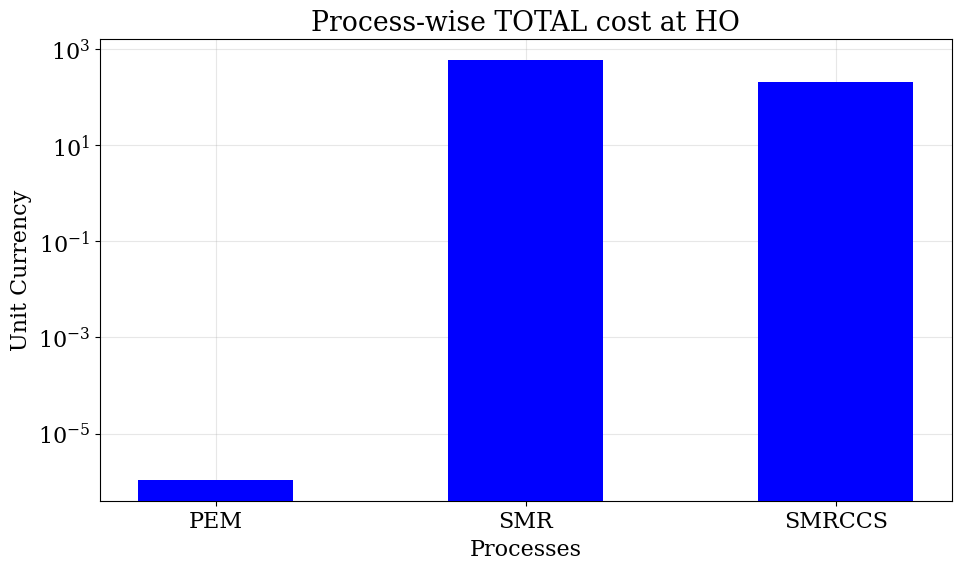

In [131]:
plot_results.cost(results=results_gwp_30, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [132]:
# data = results_gwp_30.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod30.xlsx', index=True)

In [133]:
results_gwp_30.output["objective"]

1063.665600582633

In [134]:
# data = results_gwp_30.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp30resource_emission.xlsx', index=True)

In [135]:
milp_gwp_40 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_40, network_scale_level = 0, gwp_reduction_pct = 40, gwp = results_cost.output['global_warming_potential_network'][0])


constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [136]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_40.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons1.add(expr = milp_gwp_40.P['HO', 'PEM', *i] - milp_gwp_40.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons2.add(expr = milp_gwp_40.P['HO', 'SMR', *i] - milp_gwp_40.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_40.cons3.add(expr = milp_gwp_40.P['HO', 'SMRCCS', *i] - milp_gwp_40.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_40.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_40.cons4.add(expr = milp_gwp_40.P['HO', 'SMR', *i] >= 5)

In [137]:
results_gwp_40 = solve(scenario=scenario, instance=milp_gwp_40,
                     solver='gurobi', name=f"res_gwp_40", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x8a9eefa4
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1374 rows and 1391 columns
Presolve time: 0.00s
Presolved: 199 rows, 136 columns, 639 nonzeros
Variable types: 134 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1142.6470740

Root relaxation: interrupted, 171 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [138]:
results_gwp_40.output['objective']

1142.6470740307743

In [139]:
results_gwp_40.output['global_warming_potential_location']

{('HO', 0): 3594.4166070092997}

In [140]:
results_gwp_40.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 118.92372933278807,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 2307.1500326610103,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [141]:
results_gwp_40.output['P_network']

{('Grid', 0): 0.0,
 ('PEM', 0): 0.0,
 ('PV', 0): 0.6219704764024969,
 ('SMR', 0): 500.0,
 ('SMRCCS', 0): 253.80683227929842,
 ('WF', 0): 0.05582102046572789}

In [142]:
results_gwp_40.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

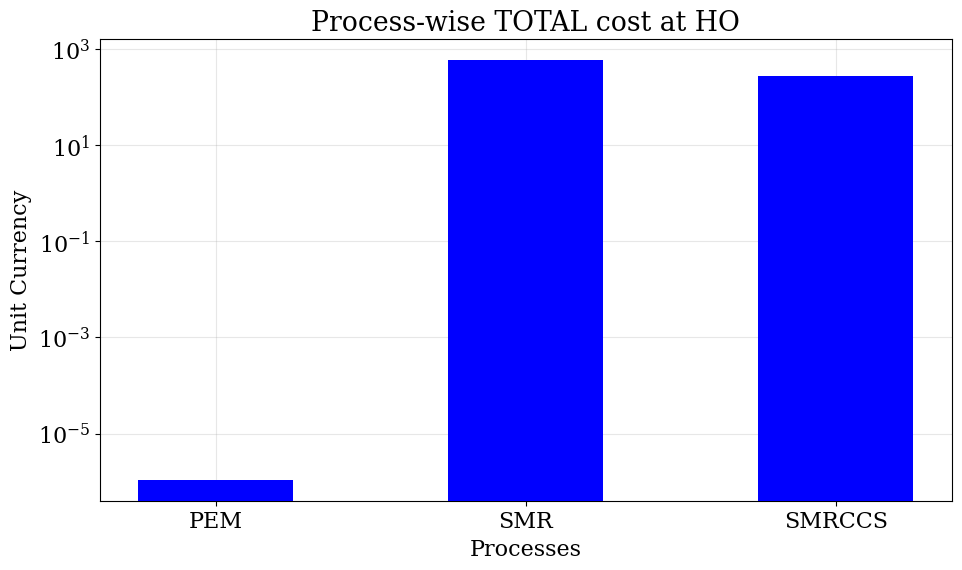

In [143]:
plot_results.cost(results=results_gwp_40, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

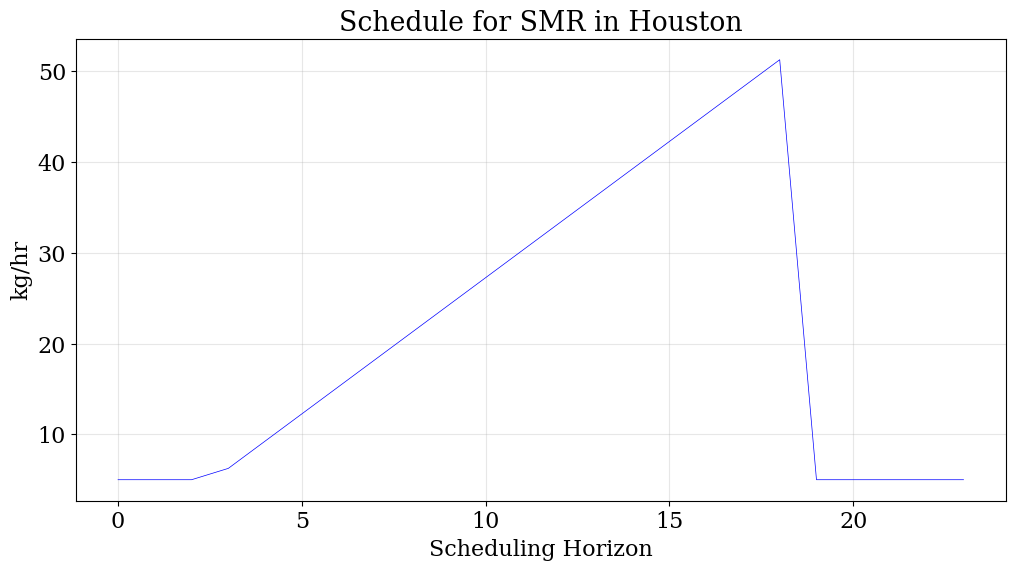

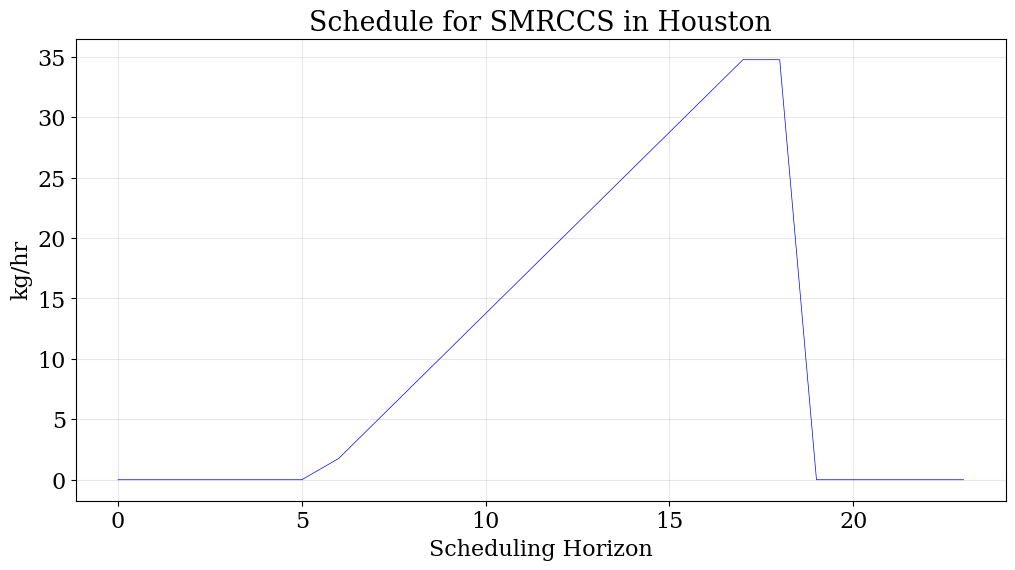

In [144]:
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_40, y_axis= 'P', component = 'SMRCCS', location='HO')


In [145]:
# data = results_gwp_40.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod40.xlsx', index=True)

In [146]:
# data = results_gwp_40.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp40resource_emission.xlsx', index=True)

In [147]:
results_gwp_40.output["objective"]

1142.6470740307743

In [148]:
milp_gwp_50 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_50, network_scale_level = 0, gwp_reduction_pct = 50, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [149]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_50.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons1.add(expr = milp_gwp_50.P['HO', 'PEM', *i] - milp_gwp_50.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons2.add(expr = milp_gwp_50.P['HO', 'SMR', *i] - milp_gwp_50.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_50.cons3.add(expr = milp_gwp_50.P['HO', 'SMRCCS', *i] - milp_gwp_50.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_50.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_50.cons4.add(expr = milp_gwp_50.P['HO', 'SMR', *i] >= 5)

In [150]:
results_gwp_50 = solve(scenario=scenario, instance=milp_gwp_50,
                     solver='gurobi', name=f"res_gwp_50", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x88f53d5a
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1377 rows and 1394 columns
Presolve time: 0.00s
Presolved: 196 rows, 133 columns, 633 nonzeros
Variable types: 131 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1221.6905926

Root relaxation: interrupted, 154 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [151]:
# data = results_gwp_50.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod50.xlsx', index=True)

In [152]:
# data = results_gwp_50.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp50resource_emission.xlsx', index=True)

In [153]:
results_gwp_50.output["objective"]

1221.6905926290665

In [154]:
results_gwp_50.output['global_warming_potential_location']

{('HO', 0): 2995.3471725077497}

In [155]:
milp_gwp_60 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_60, network_scale_level = 0, gwp_reduction_pct = 60, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [156]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_60.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons1.add(expr = milp_gwp_60.P['HO', 'PEM', *i] - milp_gwp_60.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons2.add(expr = milp_gwp_60.P['HO', 'SMR', *i] - milp_gwp_60.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_60.cons3.add(expr = milp_gwp_60.P['HO', 'SMRCCS', *i] - milp_gwp_60.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_60.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_60.cons4.add(expr = milp_gwp_60.P['HO', 'SMR', *i] >= 5)

In [157]:
results_gwp_60 = solve(scenario=scenario, instance=milp_gwp_60,
                     solver='gurobi', name=f"res_gwp_60", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xa72f32cc
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1378 rows and 1397 columns
Presolve time: 0.00s
Presolved: 195 rows, 130 columns, 629 nonzeros
Variable types: 128 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1300.7966346

Root relaxation: interrupted, 106 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

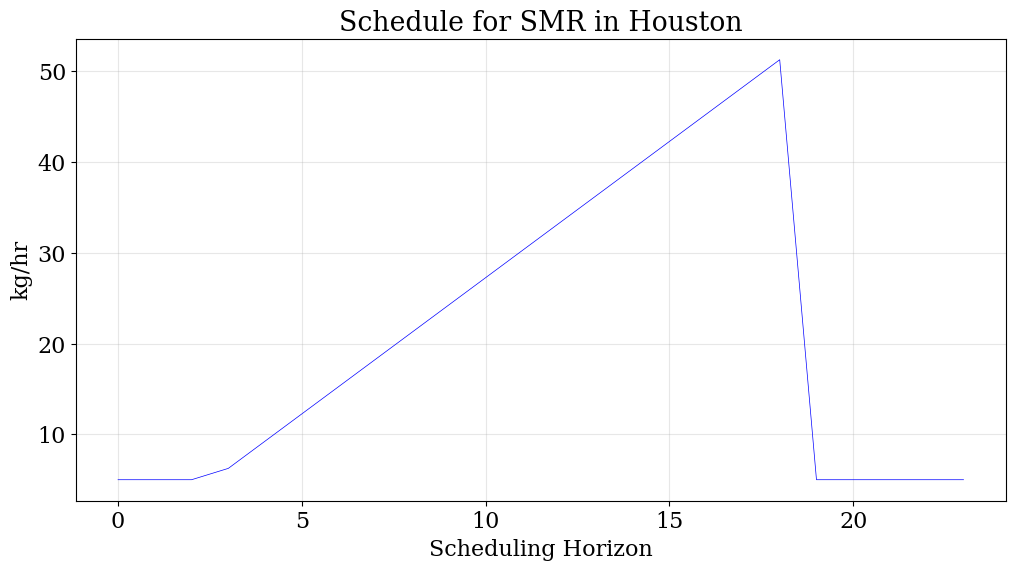

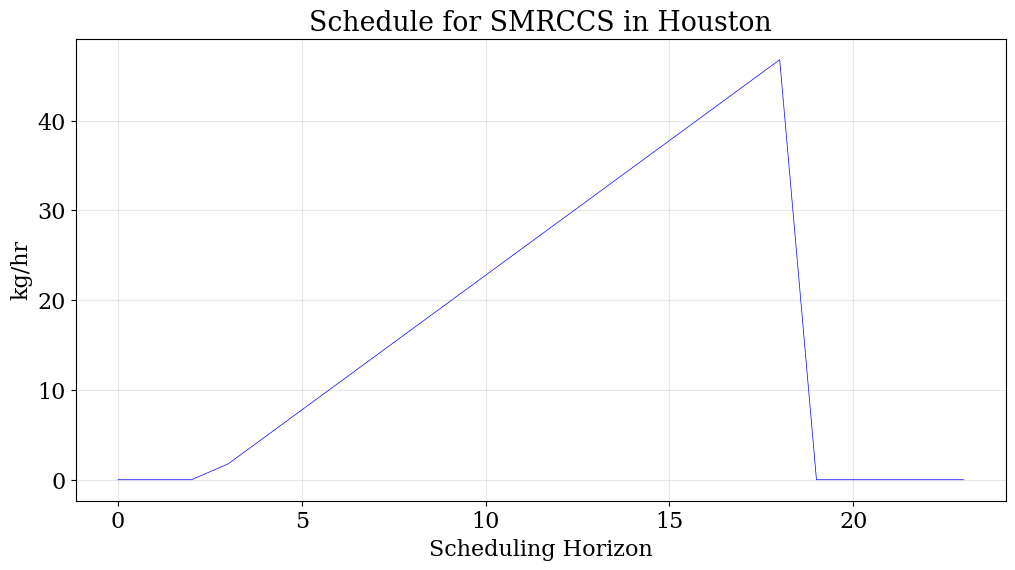

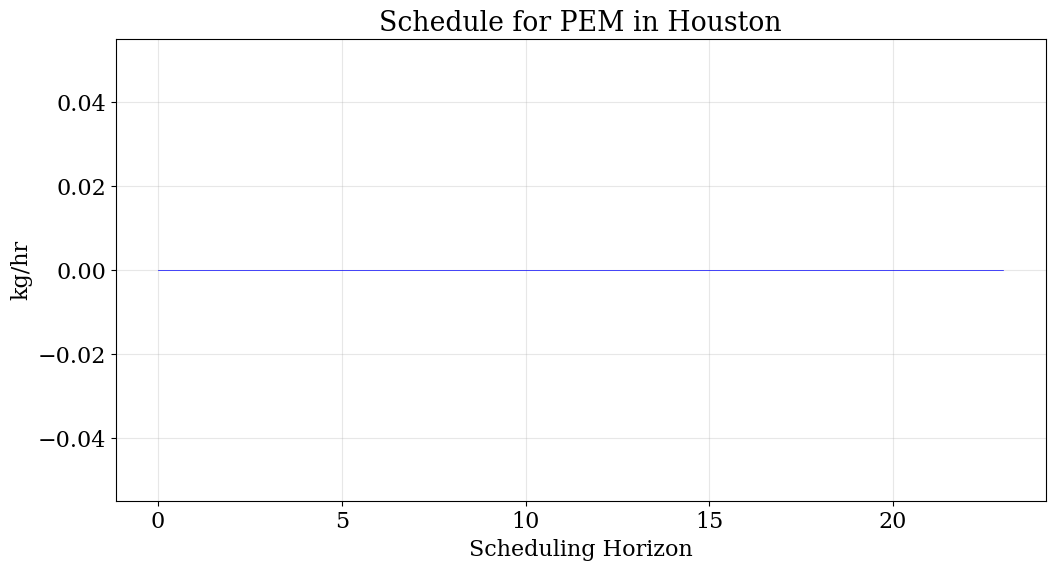

In [158]:
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMR', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'SMRCCS', location='HO')
plot_results.schedule(results = results_gwp_60, y_axis= 'P', component = 'PEM', location='HO')

In [159]:
# data = results_gwp_60.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod60.xlsx', index=True)

In [160]:
# data = results_gwp_60.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp60resource_emission.xlsx', index=True)

In [161]:
results_gwp_60.output["objective"]

1300.7966345582208

In [162]:
results_gwp_60.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [163]:
results_gwp_60.output['global_warming_potential_location']

{('HO', 0): 2396.2777380062}

In [164]:
results_gwp_60.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 181.98296148604567,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 1045.9519315046525,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [165]:
milp_gwp_70 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_70, network_scale_level = 0, gwp_reduction_pct = 70, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [166]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_70.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons1.add(expr = milp_gwp_70.P['HO', 'PEM', *i] - milp_gwp_70.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons2.add(expr = milp_gwp_70.P['HO', 'SMR', *i] - milp_gwp_70.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_70.cons3.add(expr = milp_gwp_70.P['HO', 'SMRCCS', *i] - milp_gwp_70.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_70.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_70.cons4.add(expr = milp_gwp_70.P['HO', 'SMR', *i] >= 5)

In [167]:
results_gwp_70 = solve(scenario=scenario, instance=milp_gwp_70,
                     solver='gurobi', name=f"res_gwp_70", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x58d97648
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1377 rows and 1396 columns
Presolve time: 0.00s
Presolved: 196 rows, 131 columns, 632 nonzeros
Variable types: 129 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1379.9440617

Root relaxation: interrupted, 88 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

In [168]:
# data = results_gwp_70.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod70.xlsx', index=True)

In [169]:
# data = results_gwp_70.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp70resource_emission.xlsx', index=True)

In [170]:
results_gwp_70.output["objective"]

1379.9440616690363

In [171]:
results_gwp_70.output['global_warming_potential_resource']

{('HO', 'CO2 Captured', 0): 0.0,
 ('HO', 'CO2 Vented from the process', 0): 213.51257756268458,
 ('HO', 'CO2 from air', 0): 0.0,
 ('HO', 'CO2 to Stack', 0): 415.35288092642696,
 ('HO', 'GridPower', 0): 0.0,
 ('HO', 'H2O Fresh', 0): 0.0,
 ('HO', 'H2O from air', 0): 0.0,
 ('HO', 'H2O to Stack', 0): 0.0,
 ('HO', 'H2O vented from the process', 0): 0.0,
 ('HO', 'N2 from Air', 0): 0.0,
 ('HO', 'N2 to Stack', 0): 0.0,
 ('HO', 'Natural Gas', 0): 1168.3428450155386,
 ('HO', 'O2 from air', 0): 0.0,
 ('HO', 'O2 to Stack', 0): 0.0,
 ('HO', 'Power', 0): 0.0,
 ('HO', 'Pure Hydrogen', 0): 0.0,
 ('HO', 'Solar', 0): 0.0,
 ('HO', 'Wind', 0): 0.0}

In [172]:
results_gwp_70.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [173]:
results_gwp_70.output['global_warming_potential_location']

{('HO', 0): 1797.20830350465}

In [174]:
milp_gwp_75 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_75, network_scale_level = 0, gwp_reduction_pct = 75, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [175]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_75.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons1.add(expr = milp_gwp_75.P['HO', 'PEM', *i] - milp_gwp_75.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons2.add(expr = milp_gwp_75.P['HO', 'SMR', *i] - milp_gwp_75.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_75.cons3.add(expr = milp_gwp_75.P['HO', 'SMRCCS', *i] - milp_gwp_75.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_75.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_75.cons4.add(expr = milp_gwp_75.P['HO', 'SMR', *i] >= 5)

In [176]:
results_gwp_75 = solve(scenario=scenario, instance=milp_gwp_75,
                     solver='gurobi', name=f"res_gwp_75", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x56faf51c
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1377 rows and 1396 columns
Presolve time: 0.00s
Presolved: 196 rows, 131 columns, 632 nonzeros
Variable types: 129 continuous, 2 integer (2 binary)
Found heuristic solution: objective 1419.7103336

Root relaxation: interrupted, 103 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [177]:
# data = results_gwp_75.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod75.xlsx', index=True)

In [178]:
results_gwp_75.output["objective"]

1419.7103336007438

In [179]:
results_gwp_75.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 0.0,
 ('HO', 'PEM', 0, 8): 0.0,
 ('HO', 'PEM', 0, 9): 0.0,
 ('HO', 'PEM', 0, 10): 0.0,
 ('HO', 'PEM', 0

In [180]:
results_gwp_75.output['global_warming_potential_location']

{('HO', 0): 1497.6735862538749}

In [181]:
milp_gwp_78 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_78, network_scale_level = 0, gwp_reduction_pct = 78, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [182]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_78.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons1.add(expr = milp_gwp_78.P['HO', 'PEM', *i] - milp_gwp_78.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons2.add(expr = milp_gwp_78.P['HO', 'SMR', *i] - milp_gwp_78.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_78.cons3.add(expr = milp_gwp_78.P['HO', 'SMRCCS', *i] - milp_gwp_78.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_78.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_78.cons4.add(expr = milp_gwp_78.P['HO', 'SMR', *i] >= 5)

In [183]:
results_gwp_78 = solve(scenario=scenario, instance=milp_gwp_78,
                     solver='gurobi', name=f"res_gwp_78", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xd60bdd83
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1379 rows and 1398 columns
Presolve time: 0.00s
Presolved: 194 rows, 129 columns, 604 nonzeros
Variable types: 128 continuous, 1 integer (1 binary)
Found heuristic solution: objective 1738.2061409

Root relaxation: interrupted, 120 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    B

In [184]:
results_gwp_78.output['objective']

1738.2061408926668

In [185]:
results_gwp_78.output['global_warming_potential_location']

{('HO', 0): 1317.9527559034098}

In [186]:
results_gwp_78.output["P"]

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 2.5152309419510366,
 ('HO', 'PEM', 0, 8): 2.5152309419510366,
 ('HO', 'PEM', 0, 9): 2.5152309419510366,

In [187]:
# data = results_gwp_78.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod78.xlsx', index=True)

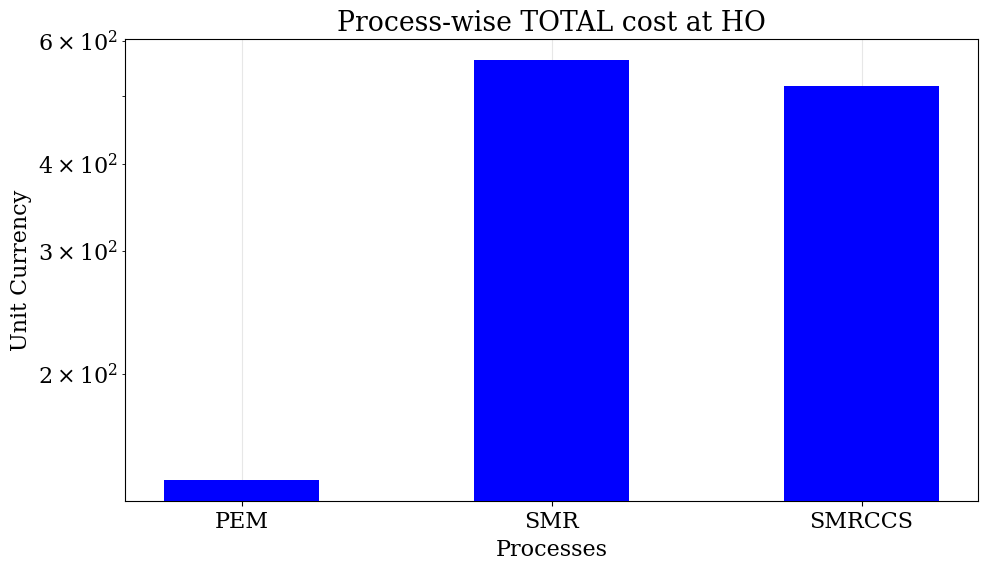

In [188]:
plot_results.cost(results=results_gwp_78, x=CostX.PROCESS_WISE,
                  y=CostY.TOTAL, location='HO', fig_size=(11, 6))

In [189]:
milp_gwp_79 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_79, network_scale_level = 0, gwp_reduction_pct = 79, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [190]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_79.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons1.add(expr = milp_gwp_79.P['HO', 'PEM', *i] - milp_gwp_79.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons2.add(expr = milp_gwp_79.P['HO', 'SMR', *i] - milp_gwp_79.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_79.cons3.add(expr = milp_gwp_79.P['HO', 'SMRCCS', *i] - milp_gwp_79.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_79.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_79.cons4.add(expr = milp_gwp_79.P['HO', 'SMR', *i] >= 5)

In [191]:
results_gwp_79 = solve(scenario=scenario, instance=milp_gwp_79,
                     solver='gurobi', name=f"res_gwp_79", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x27e81495
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1379 rows and 1398 columns
Presolve time: 0.00s
Presolved: 194 rows, 129 columns, 604 nonzeros
Variable types: 128 continuous, 1 integer (1 binary)
Found heuristic solution: objective 1954.6227764

Root relaxation: interrupted, 99 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    Be

In [192]:
results_gwp_79.output['objective']

1954.622776395539

In [193]:
results_gwp_79.output['global_warming_potential_location']

{('HO', 0): 1258.0458124532547}

In [194]:
results_gwp_79.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 3.0,
 ('HO', 'PEM', 0, 8): 4.412554534593648,
 ('HO', 'PEM', 0, 9): 4.412554534593648,
 ('HO', 'PEM', 0

In [195]:
milp_gwp_85 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_85, network_scale_level = 0, gwp_reduction_pct = 85, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [196]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_85.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons1.add(expr = milp_gwp_85.P['HO', 'PEM', *i] - milp_gwp_85.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons2.add(expr = milp_gwp_85.P['HO', 'SMR', *i] - milp_gwp_85.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_85.cons3.add(expr = milp_gwp_85.P['HO', 'SMRCCS', *i] - milp_gwp_85.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_85.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_85.cons4.add(expr = milp_gwp_85.P['HO', 'SMR', *i] >= 5)

In [197]:
results_gwp_85 = solve(scenario=scenario, instance=milp_gwp_85,
                     solver='gurobi', name=f"res_gwp_85", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xc13f0bad
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.00s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 3.253314e+03, 191 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0    

In [198]:
# data = results_gwp_85.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod85.xlsx', index=True)

In [199]:
results_gwp_85.output['objective']

3253.3141565775077

In [200]:
results_gwp_85.output['global_warming_potential_location']

{('HO', 0): 898.604151752325}

In [201]:
results_gwp_85.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 0.0,
 ('HO', 'PEM', 0, 6): 0.0,
 ('HO', 'PEM', 0, 7): 3.0,
 ('HO', 'PEM', 0, 8): 6.0,
 ('HO', 'PEM', 0, 9): 9.0,
 ('HO', 'PEM', 0, 10): 12.0,
 ('HO', 'PEM', 

In [202]:
milp_gwp_80 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_80, network_scale_level = 0, gwp_reduction_pct = 80, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [203]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_80.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons1.add(expr = milp_gwp_80.P['HO', 'PEM', *i] - milp_gwp_80.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons2.add(expr = milp_gwp_80.P['HO', 'SMR', *i] - milp_gwp_80.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_80.cons3.add(expr = milp_gwp_80.P['HO', 'SMRCCS', *i] - milp_gwp_80.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_80.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_80.cons4.add(expr = milp_gwp_80.P['HO', 'SMR', *i] >= 5)

In [204]:
results_gwp_80 = solve(scenario=scenario, instance=milp_gwp_80,
                     solver='gurobi', name=f"res_gwp_80", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xfa914cd3
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.00s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 2.171046e+03, 123 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0    

In [205]:
# data = results_gwp_80.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod80.xlsx', index=True)

In [206]:
# data = results_gwp_80.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp80resource_emission.xlsx', index=True)

In [207]:
results_gwp_80.output['objective']

2171.04624411642

In [208]:
results_gwp_80.output['global_warming_potential_location']

{('HO', 0): 1198.1388690030997}

In [209]:
milp_gwp_90 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_90, network_scale_level = 0, gwp_reduction_pct = 90, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [210]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_90.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons1.add(expr = milp_gwp_90.P['HO', 'PEM', *i] - milp_gwp_90.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons2.add(expr = milp_gwp_90.P['HO', 'SMR', *i] - milp_gwp_90.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_90.cons3.add(expr = milp_gwp_90.P['HO', 'SMRCCS', *i] - milp_gwp_90.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_90.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_90.cons4.add(expr = milp_gwp_90.P['HO', 'SMR', *i] >= 5)

In [211]:
results_gwp_90 = solve(scenario=scenario, instance=milp_gwp_90,
                     solver='gurobi', name=f"res_gwp_90", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0x02f6d459
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.00s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 4.345967e+03, 158 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0    

In [212]:
# data = results_gwp_90.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod90.xlsx', index=True)

In [213]:
# data = results_gwp_90.output['global_warming_potential_resource']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwp90resource_emission.xlsx', index=True)

In [214]:
results_gwp_90.output['objective']

4345.967410768946

In [215]:
results_gwp_90.output['global_warming_potential_location']

{('HO', 0): 599.0694345015498}

In [216]:
results_gwp_90.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 0.0,
 ('HO', 'PEM', 0, 5): 2.8769859982505728,
 ('HO', 'PEM', 0, 6): 5.876985998250573,
 ('HO', 'PEM', 0, 7): 8.876985998250573,
 ('HO', 'PEM', 0, 8): 11.876985998250573,
 ('HO', 'PEM'

In [217]:
milp_gwp_92 = formulate(scenario=scenario, constraints={Constraints.COST, Constraints.INVENTORY, Constraints.PRODUCTION,
                     Constraints.RESOURCE_BALANCE, Constraints.NETWORK, Constraints.DEMAND, Constraints.EMISSION}, objective=Objective.COST, demand_sign = 'eq')

from energiapy.model.constraints.emission import constraint_global_warming_potential_network_reduction
constraint_global_warming_potential_network_reduction(instance= milp_gwp_92, network_scale_level = 0, gwp_reduction_pct = 92, gwp = results_cost.output['global_warming_potential_network'][0])

constraint process capex
constraint process fopex
constraint process vopex
constraint process incidental
constraint storage cost
constraint storage cost location
constraint storage cost network
constraint global warming potential process
constraint global warming potential resource
constraint global warming potential resource consumption
constraint global warming potential resource discharge
constraint global warming potential location
constraint global warming potential network
constraint ozone depletion potential process
constraint ozone depletion potential resource
constraint ozone depletion potential resource consumption
constraint ozone depletion potential resource discharge
constraint ozone depletion potential location
constraint ozone depletion potential network
constraint acidification potential process
constraint acidification potential resource
constraint acidification potential resource consumption
constraint acidification potential resource discharge
constraint acidificatio

In [218]:
from pyomo.environ import ConstraintList

ramping_limit = 3

milp_gwp_92.cons1 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons1.add(expr = milp_gwp_92.P['HO', 'PEM', *i] - milp_gwp_92.P['HO', 'PEM', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons2 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons2.add(expr = milp_gwp_92.P['HO', 'SMR', *i] - milp_gwp_92.P['HO', 'SMR', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons3 = ConstraintList()
for i in scales.scale_iter(1):
    if i != (0,0):
        milp_gwp_92.cons3.add(expr = milp_gwp_92.P['HO', 'SMRCCS', *i] - milp_gwp_92.P['HO', 'SMRCCS', *scales.scale_iter(2)[scales.scale_iter(1).index(i) - 1]] <= ramping_limit)

milp_gwp_92.cons4 = ConstraintList()
for i in scales.scale_iter(2):
    milp_gwp_92.cons4.add(expr = milp_gwp_92.P['HO', 'SMR', *i] >= 5)

In [219]:
results_gwp_92 = solve(scenario=scenario, instance=milp_gwp_92,
                     solver='gurobi', name=f"res_gwp_92", print_solversteps=True, saveformat = '.pkl')

Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.1 build v11.0.1rc0 (win64 - Windows 11.0 (22000.2))

CPU model: 13th Gen Intel(R) Core(TM) i7-13700, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 24 logical processors, using up to 24 threads

Optimize a model with 1573 rows, 1527 columns and 3970 nonzeros
Model fingerprint: 0xadf4104f
Variable types: 1521 continuous, 6 integer (6 binary)
Coefficient statistics:
  Matrix range     [6e-06, 1e+04]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [3e+00, 1e+04]
Presolve removed 1381 rows and 1399 columns
Presolve time: 0.00s
Presolved: 192 rows, 128 columns, 577 nonzeros
Variable types: 128 continuous, 0 integer (0 binary)

Root relaxation: objective 4.789530e+03, 141 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

*    0    

In [220]:
results_gwp_92.output['objective']

4789.530120699898

In [221]:
results_gwp_92.output['global_warming_potential_location']

{('HO', 0): 479.2555476012397}

In [222]:
results_gwp_92.output['P']

{('HO', 'Grid', 0, 0): 0.0,
 ('HO', 'Grid', 0, 1): 0.0,
 ('HO', 'Grid', 0, 2): 0.0,
 ('HO', 'Grid', 0, 3): 0.0,
 ('HO', 'Grid', 0, 4): 0.0,
 ('HO', 'Grid', 0, 5): 0.0,
 ('HO', 'Grid', 0, 6): 0.0,
 ('HO', 'Grid', 0, 7): 0.0,
 ('HO', 'Grid', 0, 8): 0.0,
 ('HO', 'Grid', 0, 9): 0.0,
 ('HO', 'Grid', 0, 10): 0.0,
 ('HO', 'Grid', 0, 11): 0.0,
 ('HO', 'Grid', 0, 12): 0.0,
 ('HO', 'Grid', 0, 13): 0.0,
 ('HO', 'Grid', 0, 14): 0.0,
 ('HO', 'Grid', 0, 15): 0.0,
 ('HO', 'Grid', 0, 16): 0.0,
 ('HO', 'Grid', 0, 17): 0.0,
 ('HO', 'Grid', 0, 18): 0.0,
 ('HO', 'Grid', 0, 19): 0.0,
 ('HO', 'Grid', 0, 20): 0.0,
 ('HO', 'Grid', 0, 21): 0.0,
 ('HO', 'Grid', 0, 22): 0.0,
 ('HO', 'Grid', 0, 23): 0.0,
 ('HO', 'PEM', 0, 0): 0.0,
 ('HO', 'PEM', 0, 1): 0.0,
 ('HO', 'PEM', 0, 2): 0.0,
 ('HO', 'PEM', 0, 3): 0.0,
 ('HO', 'PEM', 0, 4): 2.936533937963761,
 ('HO', 'PEM', 0, 5): 5.936533937963761,
 ('HO', 'PEM', 0, 6): 8.93653393796376,
 ('HO', 'PEM', 0, 7): 11.93653393796376,
 ('HO', 'PEM', 0, 8): 14.93653393796376,
 (

In [223]:
# data = results_gwp_92.output['P']
# df = pd.DataFrame(data,index=[0])
# df = df.T
# # Export the DataFrame to an Excel file
# df.to_excel('C:/Users/marcopdsousa/Desktop/Dataframes/mingwpprod92.xlsx', index=True)